# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
df = df[["Mouse ID","Timepoint","Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].size

249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID'][df.duplicated()].to_numpy()

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
df[ df['Mouse ID'] == df['Mouse ID'][df.duplicated()].to_numpy()[0] ]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop(df[ df['Mouse ID'] == df['Mouse ID'][df.duplicated()].to_numpy()[0] ].index, inplace=True) # save the first occurance and delete the rest
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice in the clean DataFrame.
# 248 
df['Mouse ID'].nunique()

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean =  df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
stdErr = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
summary_df = pd.concat([mean, median, var, std, stdErr], axis=1)
summary_df.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

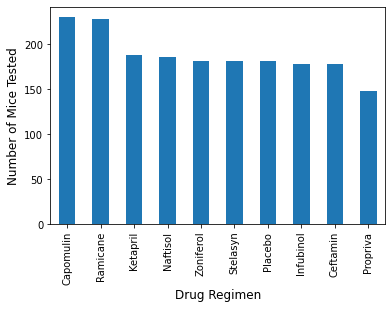

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df['Drug Regimen'].value_counts().plot.bar()
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice Tested', fontsize=12);

In [49]:
df['Drug Regimen'].value_counts().index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

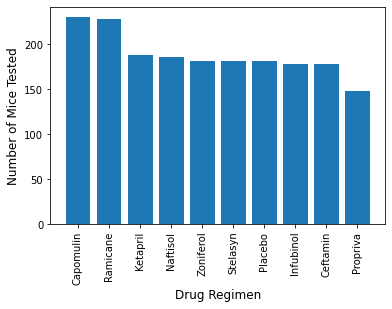

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(df['Drug Regimen'].value_counts().index, df['Drug Regimen'].value_counts())
plt.xlabel('Drug Regimen', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Mice Tested', fontsize=12);

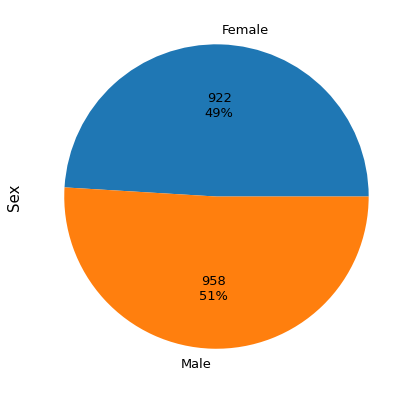

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# df.plot.pie(y='Sex', figsize=(7,7))
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df.groupby(['Sex']).size().plot(kind='pie', autopct=label_function, figsize=(7,7), textprops={'fontsize': 13})
plt.ylabel('Sex', fontsize=15);

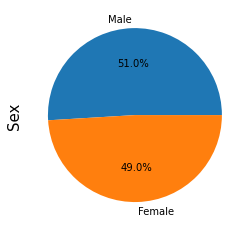

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = df['Sex'].value_counts(normalize=True).values
labels = df['Sex'].value_counts().index.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex', fontsize=15);

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
nonduplicated_df = df.groupby('Mouse ID').apply(lambda x: x[len(x)-1:len(x)])
nonduplicated_df = nonduplicated_df[ nonduplicated_df["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) ]

nonduplicated_df.reset_index(drop=True, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(df, nonduplicated_df, on="Mouse ID")
merged_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17
810,m601,30,31.758275,1,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17
811,m601,35,30.834357,1,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17
812,m601,40,31.378045,1,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17


In [100]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

merged_df = merged_df[ merged_df["Drug Regimen_x"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) ]
# merged_df = pd.concat([merged_df['Drug Regimen_x'], merged_df['Tumor Volume (mm3)_x']]
#                       , ignore_index=True)
desired_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
s1 = pd.Series([], dtype='float64')
s2 = pd.Series([], dtype='float64')
s3 = pd.Series([], dtype='float64')
s4 = pd.Series([], dtype='float64')
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for _,row in merged_df.iterrows():
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # print(row['Drug Regimen_x'])
    if _ == 0 or _ == 1:
        print(row['Tumor Volume (mm3)_x'])
    if row['Drug Regimen_x'] == 'Capomulin':
        # pass
        s1 = pd.concat([s1,pd.Series(row['Tumor Volume (mm3)_x'])])
    elif row['Drug Regimen_x'] == 'Ramicane':
        # pass
        s2 = pd.concat([s2,pd.Series(row['Tumor Volume (mm3)_x'])])
    elif row['Drug Regimen_x'] == 'Infubinol':
        # pass
        s3 = pd.concat([s3,pd.Series(row['Tumor Volume (mm3)_x'])])
    elif row['Drug Regimen_x'] == 'Ceftamin':
        # pass
        s4 = pd.concat([s4,pd.Series(row['Tumor Volume (mm3)_x'])])
        
    # if _ == 0:
    #     prev = row['Drug Regimen_x']
    #     print(row['Tumor Volume (mm3)_x'])

#     elif row['Drug Regimen_x'] != prev:
#         # append tumor volumes
#         tumor_volume_data.append(row['Drug Regimen_x'])
#         prev = row['Drug Regimen_x']
    
    # add subset 
  
    
    # Determine outliers using upper and lower bounds
tumor_volume_data.append([s1,s2,s3,s4])
tumor_volume_data[0]

45.0
45.65133131


[0    45.000000
 0    45.651331
 0    43.270852
 0    43.784893
 0    42.731552
        ...    
 0    33.118756
 0    31.758275
 0    30.834357
 0    31.378045
 0    28.430964
 Length: 230, dtype: float64,
 0    45.000000
 0    45.722279
 0    44.454378
 0    45.107423
 0    39.505135
        ...    
 0    38.248817
 0    39.005554
 0    39.769552
 0    40.442370
 0    36.374510
 Length: 228, dtype: float64,
 0    45.000000
 0    36.321346
 0    45.000000
 0    48.753112
 0    49.992954
        ...    
 0    53.078894
 0    54.363797
 0    56.523327
 0    58.315593
 0    60.918767
 Length: 178, dtype: float64,
 0    45.000000
 0    45.671104
 0    48.983717
 0    49.694665
 0    51.914910
        ...    
 0    52.430066
 0    54.952226
 0    59.253484
 0    64.192341
 0    45.000000
 Length: 178, dtype: float64]

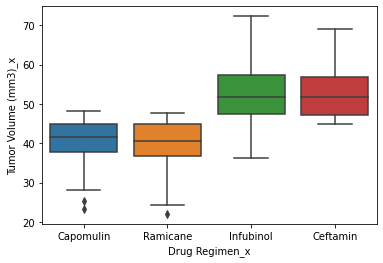

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import seaborn as sns
sns.boxplot(data=merged_df, x='Drug Regimen_x', y="Tumor Volume (mm3)_x", order=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']);

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

